<a href="https://colab.research.google.com/github/theQuert/inlpfun/blob/master/DL21_HW2_110753204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/contentf/drive', force_remount=True)

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/NCCU/HW2

/content/drive/MyDrive/NCCU/HW2


In [3]:
# Load essentials packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### 1. 

In [4]:
# Load .mat files
train_mat = scipy.io.loadmat('./train.mat')
train_df = pd.DataFrame(np.hstack((train_mat['x1'], train_mat['x2'], train_mat['y'])), columns=['x1', 'x2', 'y'])
test_mat = scipy.io.loadmat('./test.mat')
test_df = pd.DataFrame(np.hstack((test_mat['x1'], test_mat['x2'], test_mat['y'])), columns=['x1', 'x2', 'y'])

In [5]:
# Specify the size of training set and testing set for later calculation
num_statistics_train = train_df.shape[0]
num_statistics_test = test_df.shape[0]

- Function Set
$$ y=b+\sum^{m}_{i=1} w_{i}.x_i=w_{1}.x_{1}+w_{2}.x_{2}+b $$
- Loss Function (Cross Entropy)
$$ Cross Entropy= -\frac{1}{m} \sum^{m}_{i=1} y_{i}log(\hat{y_{i}} )+(1-y_{i})log\left( 1-\hat{y_{i}} \right) $$



In [6]:
# Initialization of weights and bias
w1 = np.zeros((num_statistics_train,1))
w2 = np.zeros((num_statistics_train,1))
b = 0

In [7]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [8]:
def propagate(w1, w2, b, train_df):
    m = num_statistics_train
    X1 = train_df.iloc[:, 0].to_numpy()
    X2 = train_df.iloc[:, 1].to_numpy()
    Y = train_df.iloc[:, 2].to_numpy()
    A = sigmoid(np.dot(w1.T, X1) + np.dot(w2.T, X2) + b)
    cost = np.sum(((-np.log(A))*Y + (-np.log(1-A))*(1-Y)))/m
    dw1 = (np.dot(X1, (A-Y).T))/m
    dw2 = (np.dot(X2, (A-Y).T))/m
    db = (np.sum(A-Y))/m
    
    grads = {"dw1": dw1,
             "dw2": dw2,
             "db": db}
    
    return grads, cost

In [9]:
grads, cost = propagate(w1, w2, b, train_df)
print ("dw1 = " + str(grads["dw1"]))
print ("dw2 = " + str(grads["dw2"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw1 = 0.24071428571428563
dw2 = -0.1749999999999999
db = 0.0
cost = 0.6931471805599454


In [10]:
def optimize(w1, w2, b, train_df, num_iters, lr, print_cost=False):
    costs = []
    
    for i in range(num_iters):
        grads, cost = propagate(w1, w2, b, train_df)
        dw1 = grads["dw1"]
        dw2 = grads["dw2"]
        db = grads["db"]
        
        w1 = w1 - (lr*dw1)
        w2 = w2 - (lr*dw2)
        b = b - (lr*db)
        if i % 100 == 0:
            costs.append(cost)  
    params = {"w1": w1,
              "w2": w2,
              "b": b}
    
    grads = {"dw1": dw1,
             "dw2": dw2,
             "db": db}
    
    return params, grads, costs

In [11]:
params, grads, costs = optimize(w1, w2, b, train_df, num_iters= 100, lr = 0.005)

print ("w1 = " + str(params["w1"][-1]))
print ("w2 = " + str(params["w2"][-1]))
print ("b = " + str(params["b"]))
print ("Cost after iterations: " + str(costs[-1]))

w1 = [-0.06121585]
w2 = [0.1208692]
b = 0.010700157059185166
Cost after iterations: 0.6931471805599454


In [12]:
# For testing set params inputs
w1 = params["w1"][:30]
w2 = params["w2"][:30]
b = params["b"]

In [13]:
def predict(w1, w2, b, test_df):
    m = num_statistics_test
    Y_prediction = []
    X1 = test_df.iloc[:, 0].to_numpy()
    X2 = test_df.iloc[:, 1].to_numpy()
    Y = train_df.iloc[:, 2].to_numpy()
    
    for i in range(m):
        A = sigmoid(np.dot(w1[i].T, X1[i]) + np.dot(w2[i].T, X2[i]) + b)
        if (A >= 0.5):
            Y_prediction.append(1)
        else:
            Y_prediction.append(0)
    false = 0
    for i in range(m):
        if (Y_prediction[i]!=Y[i]):
            false += 1
    
    return false/m*100

In [14]:
print('percentage of misclassified test samples: ' + str(predict(w1, w2, b, test_df)) + '%')

percentage of misclassified test samples: 30.0%


### 2. 

In [15]:
from __future__ import print_function 
import keras
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

11501568/11490434 [==============================] - 0s 0us/step


### 2.1

In [16]:
# Store the index for each digit in training set
idx_train = {}                                                                                
for i in range(10):
    idx_train[i] = []
    for j in range(len(y_train)):
        if i == y_train[j]:
            idx_train[i].append(j)

In [17]:
# # Store the index for each digit in testing set
# idx_test = {}                                                                                
# for i in range(10):
#     idx_test[i] = []
#     for j in range(len(y_test)):
#         if i == y_test[j]:
#             idx_test[i].append(j)

In [18]:
# Since each digits with 100 examples is required, we select 50/50 from training set and testing set respectively
sel_idx_train = {}
# sel_idx_test = {}
for i in range(10):
    sel_idx_train[i] = []
    # sel_idx_test[i] = []
    sel_idx_train[i].extend(random.sample(idx_train[i], 100))
    # sel_idx_test[i].extend(random.sample(idx_test[i], 50))

df_idx_train = pd.DataFrame.from_dict(sel_idx_train)
# df_idx_test = pd.DataFrame.from_dict(sel_idx_test)

In [19]:
# Rebuild training set with each digit has 100 data samples
train_filtered = []
y_filtered_label = []

for i in range(100):
    for j in range(10):
        train_filtered.append(x_train[df_idx_train.iloc[i, j]])
        y_filtered_label.append(y_train[df_idx_train.iloc[i, j]])
'''
test_filtered = []

for i in range(50):
    for j in range(10):
        test_filtered.append(x_test[df_idx_test.iloc[i, j]])
'''

'\ntest_filtered = []\n\nfor i in range(50):\n    for j in range(10):\n        test_filtered.append(x_test[df_idx_test.iloc[i, j]])\n'

In [20]:
# Rebuild x, y in ndarray format
combined_custom_x = np.asarray(train_filtered)
y_filtered_label = np.asarray(y_filtered_label)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  del sys.path[0]


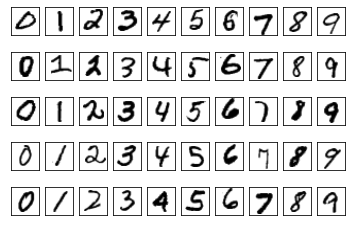

In [21]:
amount = 50
lines = 5
columns = 10
number = np.zeros(amount)
for i in range(amount): 
    number[i] = y_filtered_label[i] # print(number[0])
fig = plt.figure()
for i in range(amount):
    ax = fig.add_subplot(lines, columns, 1 + i) 
    plt.imshow(combined_custom_x[i,:,:], cmap='binary') 
    plt.sca(ax)
    ax.set_xticks([], [])
    ax.set_yticks([], [])
plt.show()

In [22]:
# Normalization on our custom data
combined_custom_x_sec = combined_custom_x.copy()
mean = np.mean(combined_custom_x_sec)
std = np.std(combined_custom_x_sec)
combined_custom_x_sec = (combined_custom_x_sec - mean) / std

In [23]:
# Calculate covariance matrix
combined_custom_x_sec = np.reshape(combined_custom_x_sec, (-1, 28*28))
cov_matrix = np.matmul(combined_custom_x_sec.T, combined_custom_x_sec)
cov_matrix.shape

(784, 784)

In [ ]:
# Calculate eigenvalues and eigenvectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
# eigenpairs for the covariance of the data (sorted in a descending order based on eigenvalues)
eig_pairs.sort(key = lambda x: x[0], reverse= True)
print(f'{np.asarray(eig_pairs)}')

### 2.3

In [25]:
# PCA
combined_custom_x_third = combined_custom_x_sec.copy()
pca = PCA(n_components = 2)
pca.fit(combined_custom_x_third)
combined_custom_x_third = pca.transform(combined_custom_x_third)

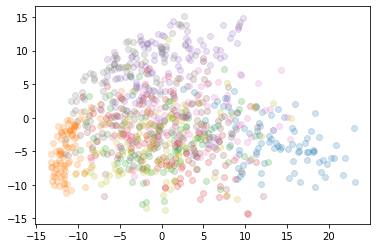

In [53]:
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for i in range(9, 18):
    for j in range(-9, 991, 10):
        plt.scatter(combined_custom_x_third[i+j, 0], combined_custom_x_third[i+j, 1], alpha=0.2, c=color[i-9])